In [1]:
import pandas as pd
from pandas import Series,DataFrame
%pylab inline
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale


Populating the interactive namespace from numpy and matplotlib


In [2]:
filename = 'Retail Transactions Data.csv'
dateparse = lambda x: pd.datetime.strptime(x, '%m/%d/%Y %H:%M')
df_retail = pd.read_csv(filename,parse_dates=['InvoiceDate'], date_parser=dateparse,encoding='cp1252')

####                                            Removing rows with 'CustomerID' blank

In [3]:
## Removing rows with CustomerID blank
print (df_retail.shape)

df_retail = df_retail.drop(df_retail[df_retail['CustomerID'].isnull()].index)

print (df_retail.shape)

(541909, 8)
(406829, 8)


#### Adding a column 'Total Price' for the transactions

In [4]:
## adding a column total price of the transaction
df_retail['Total Price'] = df_retail['UnitPrice']* df_retail['Quantity']

#### Removing entries from December 2011

In [5]:
## removing entries from december 2011

df_retail = df_retail.drop(df_retail[(df_retail['InvoiceDate'].dt.year == 2011) & (df_retail['InvoiceDate'].dt.month == 12)].index)
print (df_retail.shape)

(389168, 9)


#### Aggregating the details at Invoice level

In [6]:
## Invoice level details

def dow(dt):
    return dt.day_name()

df_invoice = df_retail.groupby(['InvoiceNo','CustomerID', 'Country','InvoiceDate'])[['Total Price', 'Quantity']].sum()
print (df_invoice.shape)
df_invoice = pd.DataFrame(df_invoice.to_records())
df_invoice['Invoice_Month'] = df_invoice['InvoiceDate'].dt.strftime("%B")
df_invoice['DayofWeek'] = df_invoice['InvoiceDate'].map(dow)
print (df_invoice.shape)
df_invoice.head(5)


(21300, 2)
(21300, 8)


,InvoiceNo,CustomerID,Country,InvoiceDate,Total Price,Quantity,Invoice_Month,DayofWeek
0,536365,17850.0,United Kingdom,2010-12-01 08:26:00,139.12,40,December,Wednesday
1,536366,17850.0,United Kingdom,2010-12-01 08:28:00,22.20,12,December,Wednesday
2,536367,13047.0,United Kingdom,2010-12-01 08:34:00,278.73,83,December,Wednesday
3,536368,13047.0,United Kingdom,2010-12-01 08:34:00,70.05,15,December,Wednesday
4,536369,13047.0,United Kingdom,2010-12-01 08:35:00,17.85,3,December,Wednesday


## Exploratory Data Analysis

#### Orders by Month

Text(0.5, 1.0, 'Distribution of Orders by Month')

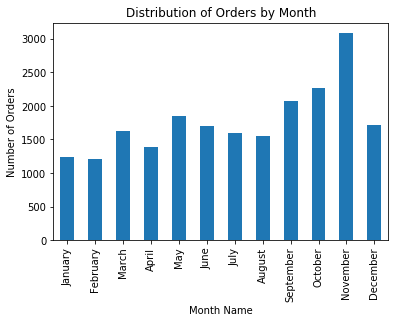

In [7]:
## Orders by Month

df_monthly = df_invoice.groupby('Invoice_Month')[['InvoiceNo']].count()
df_monthly = pd.DataFrame(df_monthly.to_records())
month_order = ["January", "February", "March", "April", "May", "June", "July","August", "September", "October", "November", "December"]
df_monthly.set_index("Invoice_Month").loc[month_order]['InvoiceNo'].plot(kind = 'bar')
xlabel('Month Name')
ylabel('Number of Orders')
title('Distribution of Orders by Month')

#### Orders by Day of the Week

Text(0.5, 1.0, 'Distribution of Orders by Day of the Week')

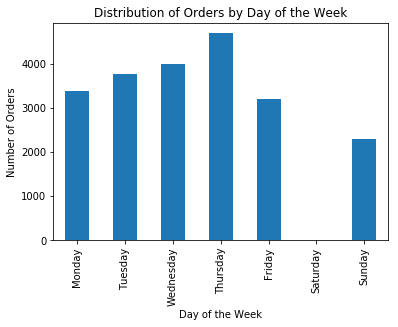

In [8]:
## Orders by Day of the Week

df_dow = df_invoice.groupby('DayofWeek')[['InvoiceNo']].count()
df_dow = pd.DataFrame(df_dow.to_records())
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_dow.set_index("DayofWeek").loc[day_order]['InvoiceNo'].plot(kind = 'bar')
xlabel('Day of the Week')
ylabel('Number of Orders')
title('Distribution of Orders by Day of the Week')

#### Orders by Country

Text(0.5, 1.0, 'Distribution of Orders by Country')

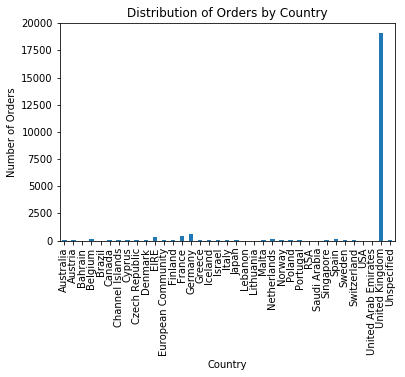

In [9]:
## Orders by Country

df_country = df_invoice.groupby('Country')[['InvoiceNo']].count()
df_country = pd.DataFrame(df_country.to_records())
df_country.set_index("Country")['InvoiceNo'].plot(kind = 'bar')
xlabel('Country')
ylabel('Number of Orders')
title('Distribution of Orders by Country')

### Aggregating data at Customer level for every month

In [10]:
## Getting data at a customer level
## customer month firstorder of month last order of month total sales in month

## Sales by Month
df_customer_sales = df_invoice.groupby(['CustomerID','Invoice_Month'])[['Total Price','Quantity']].sum()
df_customer_sales = pd.DataFrame(df_customer_sales.to_records())
#print (df_customer_sales.head(5))
print (df_customer_sales.shape)

## Orders by Month
df_customer_orders = df_invoice.groupby(['CustomerID','Invoice_Month'])[['InvoiceNo']].count()
df_customer_orders = pd.DataFrame(df_customer_orders.to_records())
#print (df_customer_orders.head(5))
print (df_customer_orders.shape)

## First order in a Month
df_customer_monthlyfirst = df_invoice.groupby(['CustomerID','Invoice_Month'])[['InvoiceDate']].min()
df_customer_monthlyfirst = pd.DataFrame(df_customer_monthlyfirst.to_records())
#print (df_customer_monthlyfirst.head(5))
print (df_customer_monthlyfirst.shape)

## Last order in a Month
df_customer_monthlylast = df_invoice.groupby(['CustomerID','Invoice_Month'])[['InvoiceDate']].max()
df_customer_monthlylast = pd.DataFrame(df_customer_monthlylast.to_records())
#print (df_customer_monthlylast.head(5))
print (df_customer_monthlylast.shape)

df_customer = df_customer_sales.merge(df_customer_monthlyfirst, on = ['CustomerID','Invoice_Month'],suffixes = ['_left','_right'])
#print (df_customer.head(5))
df_customer = df_customer.merge(df_customer_monthlylast, on = ['CustomerID','Invoice_Month'],suffixes = ['_firstorder','_lastorder'])
#print (df_customer.head(5))
df_customer = df_customer.merge(df_customer_orders, on = ['CustomerID','Invoice_Month'],suffixes = ['_firstorder','_lastorder'])
#print (df_customer.head(5))




df_customer.rename(columns = {'InvoiceDate_firstorder':'FirstOrder','InvoiceDate_lastorder':'LastOrder','InvoiceNo':'Ordercount'}, inplace = True) 
print (df_customer.head(5))
print (df_customer.shape)

(12989, 4)
(12989, 3)
(12989, 3)
(12989, 3)
   CustomerID Invoice_Month  Total Price  Quantity          FirstOrder  \
0     12346.0       January         0.00         0 2011-01-18 10:01:00   
1     12347.0         April       636.25       483 2011-04-07 10:43:00   
2     12347.0        August       584.91       277 2011-08-02 08:48:00   
3     12347.0      December       711.79       319 2010-12-07 14:57:00   
4     12347.0       January       475.39       315 2011-01-26 14:30:00   

            LastOrder  Ordercount  
0 2011-01-18 10:17:00           2  
1 2011-04-07 10:43:00           1  
2 2011-08-02 08:48:00           1  
3 2010-12-07 14:57:00           1  
4 2011-01-26 14:30:00           1  
(12989, 7)


### Seperating out Customer Transactions for first six and last six months

In [11]:
# ## Customer transactions 3 months
# df_customer_3m = df_customer[(df_customer['Invoice_Month'] == 'March') | (df_customer['Invoice_Month'] == 'April') | (df_customer['Invoice_Month'] == 'May')]

## Customer transactions first 6 months
df_customer_6m_first = df_customer[(df_customer['Invoice_Month'] == 'December') | (df_customer['Invoice_Month'] == 'January') | (df_customer['Invoice_Month'] == 'February')| (df_customer['Invoice_Month'] == 'March') | (df_customer['Invoice_Month'] == 'April') | (df_customer['Invoice_Month'] == 'May')]

## Customer transactions last 6 months
df_customer_6m_last = df_customer[(df_customer['Invoice_Month'] == 'June') | (df_customer['Invoice_Month'] == 'July') | (df_customer['Invoice_Month'] == 'August')| (df_customer['Invoice_Month'] == 'September') | (df_customer['Invoice_Month'] == 'October') | (df_customer['Invoice_Month'] == 'November')]

print (df_customer_6m_first.shape)
print (df_customer_6m_first['Invoice_Month'].unique())
print (df_customer_6m_first.head(5))

print (df_customer_6m_last.shape)
print (df_customer_6m_last['Invoice_Month'].unique())


(5527, 7)
['January' 'April' 'December' 'February' 'March' 'May']
   CustomerID Invoice_Month  Total Price  Quantity          FirstOrder  \
0     12346.0       January         0.00         0 2011-01-18 10:01:00   
1     12347.0         April       636.25       483 2011-04-07 10:43:00   
3     12347.0      December       711.79       319 2010-12-07 14:57:00   
4     12347.0       January       475.39       315 2011-01-26 14:30:00   
7     12348.0         April       367.00       269 2011-04-05 10:47:00   

            LastOrder  Ordercount  
0 2011-01-18 10:17:00           2  
1 2011-04-07 10:43:00           1  
3 2010-12-07 14:57:00           1  
4 2011-01-26 14:30:00           1  
7 2011-04-05 10:47:00           1  
(7462, 7)
['August' 'June' 'October' 'September' 'November' 'July']


### Getting RFM details  - first 6 months only

In [29]:
from datetime import datetime

def recency(dt):
    dys = (datetime.strptime('2011-11-30', "%Y-%m-%d") - dt).days
    return dys


## RFM for 6 months

## monetory value
df_customer_m = df_customer_6m_last.groupby(['CustomerID'])[['Total Price']].sum()
df_customer_m = pd.DataFrame(df_customer_m.to_records())
df_customer_m.rename(columns = {'Total Price':'Monetory'}, inplace = True) 
#print (df_customer_m.head(5))


## frequency
df_customer_f = df_customer_6m_last.groupby(['CustomerID'])[['Ordercount']].sum()
df_customer_f = pd.DataFrame(df_customer_f.to_records())
df_customer_f.rename(columns = {'Ordercount':'Frequency'}, inplace = True) 
#print (df_customer_f.head(5))

## recency

df_customer_r = df_customer_6m_last.groupby(['CustomerID'])[['LastOrder']].max()
df_customer_r = pd.DataFrame(df_customer_r.to_records())
df_customer_r['Recency'] = df_customer_r['LastOrder'].map(recency)
df_customer_r = df_customer_r.drop(columns=['LastOrder'])
#print (df_customer_r.head(5))

## getting RFM together

df_customer_rfm = df_customer_m.merge(df_customer_f,on = ['CustomerID'])
df_customer_rfm = df_customer_rfm.merge(df_customer_r,on = ['CustomerID'])
print (df_customer_rfm.shape)
print (df_customer_rfm.head(5))

(3499, 4)
   CustomerID  Monetory  Frequency  Recency
0     12347.0   2261.75          3       29
1     12348.0    310.00          1       65
2     12349.0   1757.55          1        8
3     12352.0    944.23          3       26
4     12356.0     58.35          1       12


### Getting all important customer attributes together  - last 6 months

In [30]:
def getdays(s):
    return (s.days+1)

## Getting Aggregated values at customer level

## Total Sales, Orders, Items for the first 6 months
df_customer_ov = df_customer_6m_last.groupby(['CustomerID'])[['Total Price','Quantity','Ordercount']].sum()
df_customer_ov = pd.DataFrame(df_customer_ov.to_records())
#print (df_customer_ov.head(5))

## First Order of Customer
df_customer_first = df_customer_6m_last.groupby(['CustomerID'])[['FirstOrder']].min()
df_customer_first = pd.DataFrame(df_customer_first.to_records())
#print (df_customer_first.head(5))

## Last Order of Customer
df_customer_last = df_customer_6m_last.groupby(['CustomerID'])[['LastOrder']].max()
df_customer_last = pd.DataFrame(df_customer_last.to_records())
#print (df_customer_last.head(5))

## Number of active months
df_customer_months = df_customer_6m_last.groupby(['CustomerID'])[['Invoice_Month']].count()
df_customer_months = pd.DataFrame(df_customer_months.to_records())
df_customer_months.rename(columns = {'Invoice_Month':'ActiveMonths'}, inplace = True) 
#print (df_customer_months.head(5))


## Days between first and last order
df_customer_daysbetween = df_customer_first.merge(df_customer_last, on = 'CustomerID')
df_customer_daysbetween['ActiveDays'] = (df_customer_daysbetween['LastOrder'] - df_customer_daysbetween['FirstOrder']).map(getdays)
#print (df_customer_daysbetween.head(5))


In [31]:
## Getting all important customer attributes together

df_customer_att = df_customer_ov.merge(df_customer_months, on = 'CustomerID')
df_customer_att = df_customer_att.merge(df_customer_daysbetween, on ='CustomerID')
df_customer_att = df_customer_att.drop(columns=['LastOrder','FirstOrder'])
df_customer_att = df_customer_att.merge(df_customer_r,on = 'CustomerID')
df_customer_att.rename(columns = {'Quantity':'Total Items','Ordercount': 'Total Orders','Total Price':'Total Sales'}, inplace = True)
df_customer_att['Average Basket'] = round(df_customer_att['Total Sales']/ df_customer_att['Total Orders'])
print (df_customer_att.head(5))
print (df_customer_att.shape)

   CustomerID  Total Sales  Total Items  Total Orders  ActiveMonths  \
0     12347.0      2261.75         1149             3             3   
1     12348.0       310.00          217             1             1   
2     12349.0      1757.55          631             1             1   
3     12352.0       944.23          282             3             2   
4     12356.0        58.35            5             1             1   

   ActiveDays  Recency  Average Basket  
0         144       29           754.0  
1           1       65           310.0  
2           1        8          1758.0  
3          45       26           315.0  
4           1       12            58.0  
(3499, 8)


### Getting all important customer attributes together  - last 6 months


In [15]:
def getdays(s):
    return (s.days+1)

## Getting Aggregated values at customer level

## Total Sales, Orders, Items for the first 6 months
df_customer_ov = df_customer_6m_last.groupby(['CustomerID'])[['Total Price','Quantity','Ordercount']].sum()
df_customer_ov = pd.DataFrame(df_customer_ov.to_records())
#print (df_customer_ov.head(5))

## First Order of Customer
df_customer_first = df_customer_6m_last.groupby(['CustomerID'])[['FirstOrder']].min()
df_customer_first = pd.DataFrame(df_customer_first.to_records())
#print (df_customer_first.head(5))

## Last Order of Customer
df_customer_last = df_customer_6m_last.groupby(['CustomerID'])[['LastOrder']].max()
df_customer_last = pd.DataFrame(df_customer_last.to_records())
#print (df_customer_last.head(5))

## Number of active months
df_customer_months = df_customer_6m_last.groupby(['CustomerID'])[['Invoice_Month']].count()
df_customer_months = pd.DataFrame(df_customer_months.to_records())
df_customer_months.rename(columns = {'Invoice_Month':'ActiveMonths'}, inplace = True) 
#print (df_customer_months.head(5))


## Days between first and last order
df_customer_daysbetween = df_customer_first.merge(df_customer_last, on = 'CustomerID')
df_customer_daysbetween['ActiveDays'] = (df_customer_daysbetween['LastOrder'] - df_customer_daysbetween['FirstOrder']).map(getdays)
#print (df_customer_daysbetween.head(5))


In [16]:
## Getting all important customer attributes together

df_customer_att_last6m = df_customer_ov.merge(df_customer_months, on = 'CustomerID')
df_customer_att_last6m = df_customer_att_last6m.merge(df_customer_daysbetween, on ='CustomerID')
df_customer_att_last6m = df_customer_att_last6m.drop(columns=['LastOrder','FirstOrder'])
df_customer_att_last6m.rename(columns = {'Quantity':'Total Items','Ordercount': 'Total Orders','Total Price':'Total Sales'}, inplace = True)
df_customer_att_last6m['Average Basket'] = round(df_customer_att_last6m['Total Sales']/ df_customer_att_last6m['Total Orders'])
print (df_customer_att_last6m.head(5))
print (df_customer_att_last6m.shape)

   CustomerID  Total Sales  Total Items  Total Orders  ActiveMonths  \
0     12347.0      2261.75         1149             3             3   
1     12348.0       310.00          217             1             1   
2     12349.0      1757.55          631             1             1   
3     12352.0       944.23          282             3             2   
4     12356.0        58.35            5             1             1   

   ActiveDays  Average Basket  
0         144           754.0  
1           1           310.0  
2           1          1758.0  
3          45           315.0  
4           1            58.0  
(3499, 7)


## Cleaning the Data

#### Removing customers with negative sales

In [32]:
## Removing customers with negative sales

print (df_customer_att.shape)
print (df_customer_rfm.shape)
print (df_customer_att_last6m.shape)

df_customer_att = df_customer_att[df_customer_att['Total Sales'] > 0]
df_customer_rfm = df_customer_rfm[df_customer_rfm['Monetory'] > 0 ]
df_customer_att_last6m = df_customer_att_last6m[df_customer_att_last6m['Total Sales'] > 0]

print (df_customer_att.shape)
print (df_customer_rfm.shape)
print (df_customer_att_last6m.shape)

(3499, 8)
(3499, 4)
(3455, 7)
(3455, 8)
(3455, 4)
(3455, 7)


#### Removing outliers (beyond 3 std from the mean)

In [33]:
## Removing the outliers



print (df_customer_att.describe())
print ('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
print (df_customer_rfm.describe())
print ('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')


for col in ['Total Sales','Total Items','Total Orders','Average Basket']:

    mn = df_customer_att[col].mean()
    sd = df_customer_att[col].std()
    ## Checking if the that column has outliers
    def isnotoutlier(n):
        if n > (mn+ (3* sd)):
            return False
        elif n < (mn - (3* sd)):
            return False
        else:
            return True

    is_notoutlier = df_customer_att[col].map(isnotoutlier)

    df_customer_att = df_customer_att[is_notoutlier]
    df_customer_rfm = df_customer_rfm[is_notoutlier]


print (df_customer_att.describe())
print ('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
print (df_customer_rfm.describe())
print ('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')

         CustomerID   Total Sales    Total Items  Total Orders  ActiveMonths  \
count   3455.000000  3.455000e+03    3455.000000   3455.000000   3455.000000   
mean   15294.629812  1.402708e+03     831.331983      3.532851      2.143849   
std     1717.059530  5.803440e+03    3061.322556      5.740177      1.403064   
min    12347.000000  4.547474e-13    -287.000000      1.000000      1.000000   
25%    13816.500000  2.804000e+02     153.000000      1.000000      1.000000   
50%    15299.000000  5.569500e+02     328.000000      2.000000      2.000000   
75%    16779.500000  1.240105e+03     780.000000      4.000000      3.000000   
max    18287.000000  1.804690e+05  110006.000000    164.000000      6.000000   

        ActiveDays      Recency  Average Basket  
count  3455.000000  3455.000000     3455.000000  
mean     57.746454    46.256440      342.271491  
std      61.942190    46.689604      362.798978  
min       1.000000    -1.000000        0.000000  
25%       1.000000    11.0000

In [34]:
print (df_customer_att.shape,df_customer_rfm.shape)
print(df_customer_att.head(5))

(3263, 8) (3263, 4)
   CustomerID  Total Sales  Total Items  Total Orders  ActiveMonths  \
0     12347.0      2261.75         1149             3             3   
1     12348.0       310.00          217             1             1   
3     12352.0       944.23          282             3             2   
4     12356.0        58.35            5             1             1   
6     12358.0       484.86          100             1             1   

   ActiveDays  Recency  Average Basket  
0         144       29           754.0  
1           1       65           310.0  
3          45       26           315.0  
4           1       12            58.0  
6           1      140           485.0  


## Clustering Based on R,F,M 

### Based on Recency

[[ 96.49881797]
 [ 12.2       ]
 [ 50.0261959 ]
 [153.55722892]]


4    1630
3     878
2     423
1     332
Name: RecencyCluster, dtype: int64

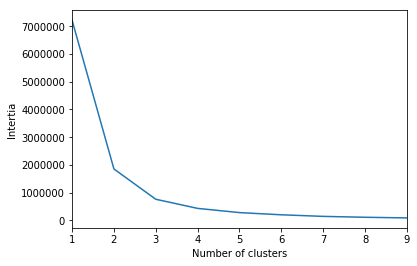

In [35]:
#Clusters on Recency value

recency_data = df_customer_rfm[['Recency']]

sum_of_distances = {}
for num_clusters in range(1,10):
    kmeans = KMeans(init='k-means++', n_clusters=num_clusters, random_state=1)
    kmeans.fit(recency_data)
    sum_of_distances[num_clusters] = kmeans.inertia_
Series(sum_of_distances).sort_index().plot()
xlabel('Number of clusters')
ylabel('Intertia')

# Clustering
kmeans = KMeans(init='k-means++', n_clusters=4, random_state=1)
kmeans.fit(recency_data)
recency_cluster_centers = kmeans.cluster_centers_
print (recency_cluster_centers)

## Sorting the cluster labels
idx = np.argsort(kmeans.cluster_centers_.sum(axis=1))
lut = np.zeros_like(idx)
lut[idx] = np.arange(3,-1,-1)


df_customer_rfm['RecencyCluster'] = lut[kmeans.labels_]
df_customer_rfm['RecencyCluster'] = df_customer_rfm['RecencyCluster'].apply(lambda x:x+1)
df_customer_rfm['RecencyCluster'].value_counts()

In [36]:
df_customer_rfm.groupby('RecencyCluster')['Recency'].mean()

RecencyCluster
1    153.557229
2     96.498818
3     50.026196
4     12.200000
Name: Recency, dtype: float64

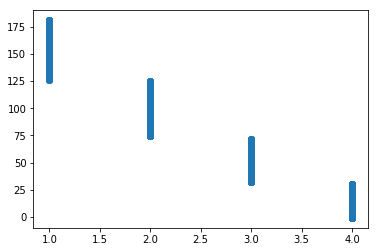

In [37]:
plt.scatter(df_customer_rfm['RecencyCluster'],df_customer_rfm['Recency'])

### Based on Frequency

[[1.35530381]
 [9.52879581]
 [5.73177083]
 [3.42359249]]
1    1942
2     746
3     384
4     191
Name: FrequencyCluster, dtype: int64


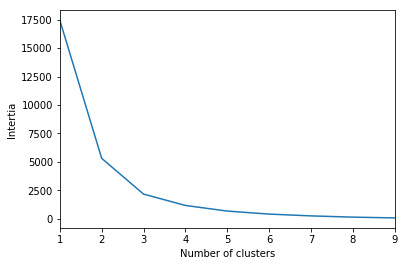

In [38]:
#Clusters on Frequency value

frequency_data = df_customer_rfm[['Frequency']]

sum_of_distances = {}
for num_clusters in range(1,10):
    kmeans = KMeans(init='k-means++', n_clusters=num_clusters, random_state=1)
    kmeans.fit(frequency_data)
    sum_of_distances[num_clusters] = kmeans.inertia_
Series(sum_of_distances).sort_index().plot()
xlabel('Number of clusters')
ylabel('Intertia')

# Clustering
kmeans = KMeans(init='k-means++', n_clusters=4, random_state=1)
kmeans.fit(frequency_data)
frequency_cluster_centers = kmeans.cluster_centers_
print (frequency_cluster_centers)

## Sorting the cluster labels
idx = np.argsort(kmeans.cluster_centers_.sum(axis=1))
lut = np.zeros_like(idx)
lut[idx] = np.arange(4)

df_customer_rfm['FrequencyCluster'] = lut[kmeans.labels_]
df_customer_rfm['FrequencyCluster'] = df_customer_rfm['FrequencyCluster'].apply(lambda x:x+1)
print (df_customer_rfm['FrequencyCluster'].value_counts())


In [39]:
df_customer_rfm.groupby('FrequencyCluster')['Frequency'].mean()

FrequencyCluster
1    1.355304
2    3.423592
3    5.731771
4    9.528796
Name: Frequency, dtype: float64

### Based on Monetory Value

[[ 354.98062875]
 [2566.76126354]
 [1222.01487342]
 [4965.81866667]]
1    2134
2     791
3     278
4      60
Name: MonetoryCluster, dtype: int64


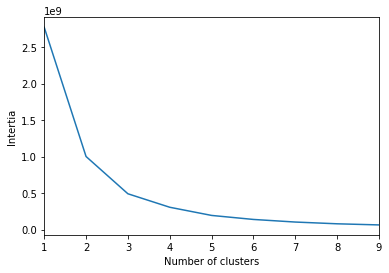

In [40]:

#Clusters on Monetory value

monetory_data = df_customer_rfm[['Monetory']]

sum_of_distances = {}
for num_clusters in range(1,10):
    kmeans = KMeans(init='k-means++', n_clusters=num_clusters, random_state=1)
    kmeans.fit(monetory_data)
    sum_of_distances[num_clusters] = kmeans.inertia_
Series(sum_of_distances).sort_index().plot()
xlabel('Number of clusters')
ylabel('Intertia')

# Clustering
kmeans = KMeans(init='k-means++', n_clusters=4, random_state=1)
kmeans.fit(monetory_data)
monetory_cluster_centers = kmeans.cluster_centers_
print (monetory_cluster_centers)

## Sorting the cluster labels
idx = np.argsort(kmeans.cluster_centers_.sum(axis=1))
lut = np.zeros_like(idx)
lut[idx] = np.arange(4)


df_customer_rfm['MonetoryCluster'] = lut[kmeans.labels_]
df_customer_rfm['MonetoryCluster'] = df_customer_rfm['MonetoryCluster'].apply(lambda x:x+1)
print (df_customer_rfm['MonetoryCluster'].value_counts())


In [41]:
df_customer_rfm.groupby('MonetoryCluster')['Monetory'].mean()

MonetoryCluster
1     354.573216
2    1220.069393
3    2564.349317
4    4965.818667
Name: Monetory, dtype: float64

#### Creating an RFM Segment

In [42]:
df_customer_rfm['RFMCombined'] = (df_customer_rfm['RecencyCluster']*100)+((df_customer_rfm['FrequencyCluster']*10))+df_customer_rfm['MonetoryCluster']
print (df_customer_rfm.head(5))
print (df_customer_rfm.shape)

   CustomerID  Monetory  Frequency  Recency  RecencyCluster  FrequencyCluster  \
0     12347.0   2261.75          3       29               4                 2   
1     12348.0    310.00          1       65               3                 1   
3     12352.0    944.23          3       26               4                 2   
4     12356.0     58.35          1       12               4                 1   
6     12358.0    484.86          1      140               1                 1   

   MonetoryCluster  RFMCombined  
0                3          423  
1                1          311  
3                2          422  
4                1          411  
6                1          111  
(3263, 8)


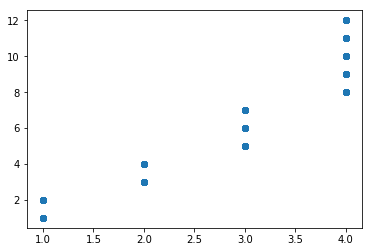

In [43]:
plt.scatter(df_customer_rfm['FrequencyCluster'],df_customer_rfm['Frequency'])

In [52]:
df_customer_rfm.to_csv('Last6MonthsRFM.csv')

#### Getting Stats at RFM Segment Level

In [44]:
### Getting stats by RFM Segment

## Number of customers per segment
df_rfm_counts = df_customer_rfm.groupby(['RFMCombined'])[['CustomerID']].count()
df_rfm_counts = pd.DataFrame(df_rfm_counts.to_records())
df_rfm_counts.rename(columns = {'CustomerID':'CustomerCount'}, inplace = True) 

## Avg. R,F,M per segment
df_rfm_avgs = df_customer_rfm.groupby(['RFMCombined'])[['Frequency','Recency','Monetory']].mean()
df_rfm_avgs = pd.DataFrame(df_rfm_avgs.to_records())
df_rfm_avgs.rename(columns = {'Frequency':'Avg_Frequency','Recency':'Avg_Recency','Monetory':'Avg_Monetory'}, inplace = True) 


## Total M per segment
df_rfm_sums = df_customer_rfm.groupby(['RFMCombined'])[['Monetory']].sum()
df_rfm_sums = pd.DataFrame(df_rfm_sums.to_records())
df_rfm_sums.rename(columns = {'Monetory':'Total_Monetory'}, inplace = True) 

## Merging them together
df_rfm_att = df_rfm_counts.merge(df_rfm_avgs, on = 'RFMCombined')
df_rfm_att = df_rfm_att.merge(df_rfm_sums, on = 'RFMCombined')


## Sorting the dataframe based of RFM segment
df_rfm_att = df_rfm_att.sort_values(by=['RFMCombined'],ascending = False)

print (df_rfm_att.head(5))
print (df_rfm_att.shape)

    RFMCombined  CustomerCount  Avg_Frequency  Avg_Recency  Avg_Monetory  \
46          444             36       9.777778     8.861111   5093.654444   
45          443             87       9.563218     8.655172   2686.731609   
44          442             51       9.274510    10.392157   1500.013137   
43          441              2       9.500000    13.000000    652.000000   
42          434             12       5.916667     9.916667   4960.486667   

    Total_Monetory  
46       183371.56  
45       233745.65  
44        76500.67  
43         1304.00  
42        59525.84  
(47, 6)


### Predicting last 6 months Sales from first 6 months RFM values

#### Getting the required columns together

In [45]:
df_model = df_customer_rfm.merge(df_customer_att_last6m, on = 'CustomerID')
#df_model = df_model.drop(columns=['RecencyCluster','FrequencyCluster','MonetoryCluster','RFMCombined','Total Orders'])
df_model = df_model.drop(columns=['RecencyCluster','FrequencyCluster','MonetoryCluster','RFMCombined','Total Orders','ActiveDays','Total Items'])
df_model.rename(columns = {'Total Sales':'Sales_next6m'}, inplace = True) 

print (df_model.shape)
print (df_model.head(5))

(3263, 7)
   CustomerID  Monetory  Frequency  Recency  Sales_next6m  ActiveMonths  \
0     12347.0   2261.75          3       29       2261.75             3   
1     12348.0    310.00          1       65        310.00             1   
2     12352.0    944.23          3       26        944.23             2   
3     12356.0     58.35          1       12         58.35             1   
4     12358.0    484.86          1      140        484.86             1   

   Average Basket  
0           754.0  
1           310.0  
2           315.0  
3            58.0  
4           485.0  


In [46]:
## Removing the outliers



print (df_model.describe())
print ('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
print (df_model.shape)


for col in ['Monetory','Frequency','Recency','Sales_next6m','ActiveMonths','Average Basket']:

    mn = df_model[col].mean()
    sd = df_model[col].std()
    ## Checking if the that column has outliers
    def isnotoutlier(n):
        if n > (mn+ (3* sd)):
            return False
        elif n < (mn - (3* sd)):
            return False
        else:
            return True

    is_notoutlier = df_model[col].map(isnotoutlier)

    df_model = df_model[is_notoutlier]


print (df_model.describe())
print ('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
print (df_model.shape)



         CustomerID      Monetory    Frequency      Recency  Sales_next6m  \
count   3263.000000  3.263000e+03  3263.000000  3263.000000  3.263000e+03   
mean   15309.966902  8.374417e+02     2.821637    47.688937  8.374417e+02   
std     1707.919792  9.216396e+02     2.313172    47.039306  9.216396e+02   
min    12347.000000  4.547474e-13     1.000000    -1.000000  4.547474e-13   
25%    13847.000000  2.629400e+02     1.000000    12.000000  2.629400e+02   
50%    15322.000000  5.123100e+02     2.000000    32.000000  5.123100e+02   
75%    16793.500000  1.067750e+03     4.000000    68.000000  1.067750e+03   
max    18287.000000  8.603260e+03    12.000000   181.000000  8.603260e+03   

       ActiveMonths  Average Basket  
count   3263.000000     3263.000000  
mean       2.019614      301.209317  
std        1.255368      205.907319  
min        1.000000        0.000000  
25%        1.000000      159.000000  
50%        2.000000      249.000000  
75%        3.000000      380.000000  
ma

#### Getting the X and Y for Modelling

In [47]:
X = df_model.drop(['CustomerID','Sales_next6m'],axis=1)
y = df_model['Sales_next6m']
print (X.shape)
print (y.shape)
print (X.head(5))
print (y.head(5))

X_scaled = DataFrame(scale(X, with_mean = True, with_std = True), index=X.index, columns=X.columns)
print(X_scaled.head(5))

(2980, 5)
(2980,)
   Monetory  Frequency  Recency  ActiveMonths  Average Basket
0   2261.75          3       29             3           754.0
1    310.00          1       65             1           310.0
2    944.23          3       26             2           315.0
3     58.35          1       12             1            58.0
4    484.86          1      140             1           485.0
0    2261.75
1     310.00
2     944.23
3      58.35
4     484.86
Name: Sales_next6m, dtype: float64
   Monetory  Frequency   Recency  ActiveMonths  Average Basket
0  2.932310   0.318013 -0.440441      1.093070        2.907188
1 -0.607622  -0.836988  0.314480     -0.811812        0.217434
2  0.542695   0.318013 -0.503351      0.140629        0.247724
3 -1.064046  -0.836988 -0.796931     -0.811812       -1.309184
4 -0.290475  -0.836988  1.887232     -0.811812        1.277585


In [48]:
print (X.describe())
print (X_scaled.describe())
print(y.head(5))

           Monetory    Frequency      Recency  ActiveMonths  Average Basket
count  2.980000e+03  2980.000000  2980.000000   2980.000000     2980.000000
mean   6.450140e+02     2.449329    50.003356      1.852349      274.108054
std    5.514448e+02     1.731891    47.695127      1.050110      165.098513
min    4.547474e-13     1.000000    -1.000000      1.000000        0.000000
25%    2.435575e+02     1.000000    13.000000      1.000000      153.750000
50%    4.550700e+02     2.000000    34.000000      1.000000      237.500000
75%    8.877125e+02     3.000000    71.000000      2.000000      354.500000
max    2.720560e+03     9.000000   181.000000      5.000000      876.000000
           Monetory     Frequency       Recency  ActiveMonths  Average Basket
count  2.980000e+03  2.980000e+03  2.980000e+03  2.980000e+03    2.980000e+03
mean   4.653250e-17 -1.140773e-16  4.563836e-18 -2.778538e-16   -2.052795e-16
std    1.000168e+00  1.000168e+00  1.000168e+00  1.000168e+00    1.000168e+00
min 

In [49]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lm = linear_model.LinearRegression()
lm.fit(X_scaled,y)
print ('Coefficients of the model:')
print (lm.coef_)
y_predicted = lm.predict(X_scaled)
mae = mean_squared_error(y,y_predicted,sample_weight = None, multioutput = 'uniform_average')
print ('The Mean Squared Error (MSE) on the Data is', mae)
rsquared = r2_score(y,y_predicted)
print ('The R2 for this model is: ',round(rsquared,2))


#plt.scatter((X_scaled['Recency']),(y-y_predicted))

Coefficients of the model:
[ 5.51352300e+02 -5.09691246e-14  4.59005065e-14  2.76952357e-14
  4.46390519e-14]
The Mean Squared Error (MSE) on the Data is 1.2045310194494827e-25
The R2 for this model is:  1.0


In [50]:
import statsmodels.api as sm

stat_X = sm.add_constant(X_scaled)
stats_lr = sm.OLS(y, stat_X)
est2 = stats_lr.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           Sales_next6m   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.363e+33
Date:                Sun, 10 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:32:31   Log-Likelihood:                 81122.
No. Observations:                2980   AIC:                        -1.622e+05
Df Residuals:                    2974   BIC:                        -1.622e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            645.0140   6.68e-15   9.66e

In [143]:
import xgboost
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2)


#XGBoost Multiclassification Model
xgb = xgboost.XGBRegressor(learning_rate=0.1, gamma=0, subsample=0.75,
                           colsample_bytree=0.8, max_depth=2)

xgb.fit(X_train,y_train)
predictions = xgb.predict(X_test)
print(r2_score(predictions,y_test))


[18:37:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.7798617808208785
